In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lec_act_6_matrices.ipynb")

# Using matrices

Do a small number of matrix transformations "by hand" to understand what they do. These are the first few transforms you'll need in the lab and homework. Note that, in those assignments, you'll be doing these transforms in functions in order to build up to doing a robot arm reaching goal.


See Lecture slides for matrix information: https://docs.google.com/presentation/d/12p3VOVT5yL14-1z5T20hTscpVC0hsxjtvMLHmQLFITk/edit?usp=sharing

See Lab slides for expected results: https://docs.google.com/presentation/d/1Ut5RnIKU8DF8k_joGXp4tJ1FzBKNIX8JYRE9wkIP_qE/edit?usp=sharing

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# Slightly different import format here - this gets just those routines by name (no mr.)
from matrix_routines import make_scale_matrix, make_translation_matrix, make_rotation_matrix
# The same plot functions as were used in the tutorial
from matrix_routines import plot_pts, plot_axes_and_big_box

### Make a square.

TODO: Create a numpy array of points that form a square. The square should go from -1 to 1.


In [3]:
# The numpy array for the points for a square
pts_square = np.ones((3, 4))

# Set the four points to be the corners of a square

pts_square[0:2, 0] = [1,1]
pts_square[0:2, 1] = [1,-1]
pts_square[0:2, 2] = [-1,-1]
pts_square[0:2, 3] = [-1,1]
print(pts_square)



[[ 1.  1. -1. -1.]
 [ 1. -1. -1.  1.]
 [ 1.  1.  1.  1.]]


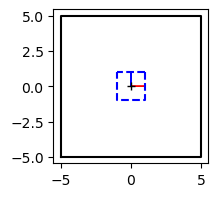

In [4]:
# Draw the square in the plot window - see slides for correct answer
fig, axs = plt.subplots(1, 1, figsize=(2, 2))

# A framing window
plot_axes_and_big_box(axs)

# Plot the square
plot_pts(axs, pts_square, fmt="--b")

In [5]:
grader.check("make_square")

make_square results: All test cases passed!

### Arm link

Create a matrix that makes a rectangle from the square. See picture in slides
- The left hand side of the rectangle should lie on the x=0 line
- The long direction of the rectangle should be **link_length** and point to the right
- The narrow direction of the rectangle should be **link_width** and be centered on the y axis

In [6]:
# You can always start with an identity matrix that doesn't transform (it's like multiplying by 1)
mat_transform_square = np.identity(3)

link_length = 3.5
link_width = 2.5
# TODO: Scale and translate the square to make the desired rectangle
#   Try scaling first, then translate after the scale
#   Remember that the original square goes from -1 to 1, so it's width/height is actually 2


mat_scale_square =  make_scale_matrix(link_length/2, link_width/2) @ mat_transform_square

mat_transform_square = make_translation_matrix(link_length/2, 0) @ mat_scale_square



<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

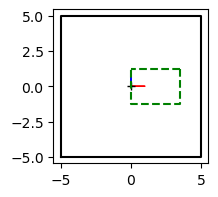

In [7]:
# Plot the result - see slides
# Draw the square in the plot window - see slides for correct answer
fig, axs = plt.subplots(1, 1, figsize=(2,2))
mat_base_check = np.array([[0, -0.5, 0], [0.25, 0.0, 0.25], [0.0, 0.0, 1.0]])
# A framing window
base = np.array([[ 0.5000,  0.5625, -0.0625,  0.0000],
 [ 0.2500,  0.0000,  0.0000,  0.2500],
 [ 1.0000,  1.0000,  1.0000,  1.0000]])
something = np.array([[0.25, 0.0, 0.25], [0.0, 0.125, 0.0], [0.0, 0.0, 1.0]])
plot_axes_and_big_box(axs)

# Plot the transformed square
plot_pts(axs, mat_transform_square @ pts_square, fmt="--g")
plt.tight_layout

In [8]:
grader.check("long_skinny_rect")

long_skinny_rect results: All test cases passed!

## Rotate the link

Now rotate the link around it's base by 30 degrees

Notice that this matrix is pre-pended to the existing one - it rotates *after* the scale and translate

In [9]:
# You can always start with an identity matrix that doesn't transform (it's like multiplying by 1)
mat_rotate_link = np.identity(3)

rotate_amt = 2 * np.pi * (30.0/360.0)  # Convert from degrees to radians
# TODO: Build a rotation matrix - the reason we put the link with the left side at 0,0 is so that this rotation causes
#   the link to pivot around the base
mat_rotate_link = make_rotation_matrix(rotate_amt) @ mat_rotate_link


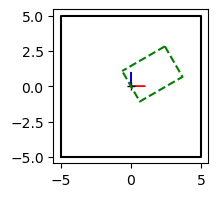

In [10]:
# Plot the result - see slides
fig, axs = plt.subplots(1, 1, figsize=(2, 2))

# A framing window
plot_axes_and_big_box(axs)

# Plot the transformed square - notice that we string the matrices together here
#   In the Lab you'll be building the mat_transform_square separately from the mat_rotate_link because you'll scale all of the
#   geoemtry first, then roatate all of the links to put them together
plot_pts(axs, mat_rotate_link @ mat_transform_square @ pts_square, fmt="--g")

In [11]:
grader.check("Rotate_link")

Rotate_link results: All test cases passed!

### Make a smaller link and attach it to the bigger one

TODO
- Make a matrix to scale and translate the square again, this time making it linK_length_small and link_width_small
- Make a matrix to rotate it by -75 degrees
- Make a matrix to translate the base of the smaller one to the end of the big one *before* it is rotated
- Follow the instructions to rotate both the little one and the big one by the 30 degrees

In [12]:
# Build these two the same way you did above
mat_transform_square_small = np.identity(3)
mat_rotate_link_small = np.identity(3)

link_length_small = 1.5
link_width_small = 0.5
rotate_amt_small = 2 * np.pi * (-75.0/360.0)  # Convert from degrees to radians

# TODO: edit the two above matrices
mat_scale_square_small = make_scale_matrix(link_length_small/2, link_width_small/2) @ mat_transform_square_small
mat_transform_square_small = make_translation_matrix(link_length_small/2, link_width_small/2) @ mat_scale_square_small
mat_rotate_link_small = make_rotation_matrix(rotate_amt_small) @ mat_rotate_link_small



In [13]:
# One more matrix - define this matrix so that it translates the base (0,0) of the smaller link to the end of the larger link BEFORE
#  it is rotated. This should be a translation by link_length, 0 
mat_move_small_to_end_of_big = np.identity(3)

mat_move_small_to_end_of_big = make_translation_matrix(link_length, 0) @ mat_move_small_to_end_of_big


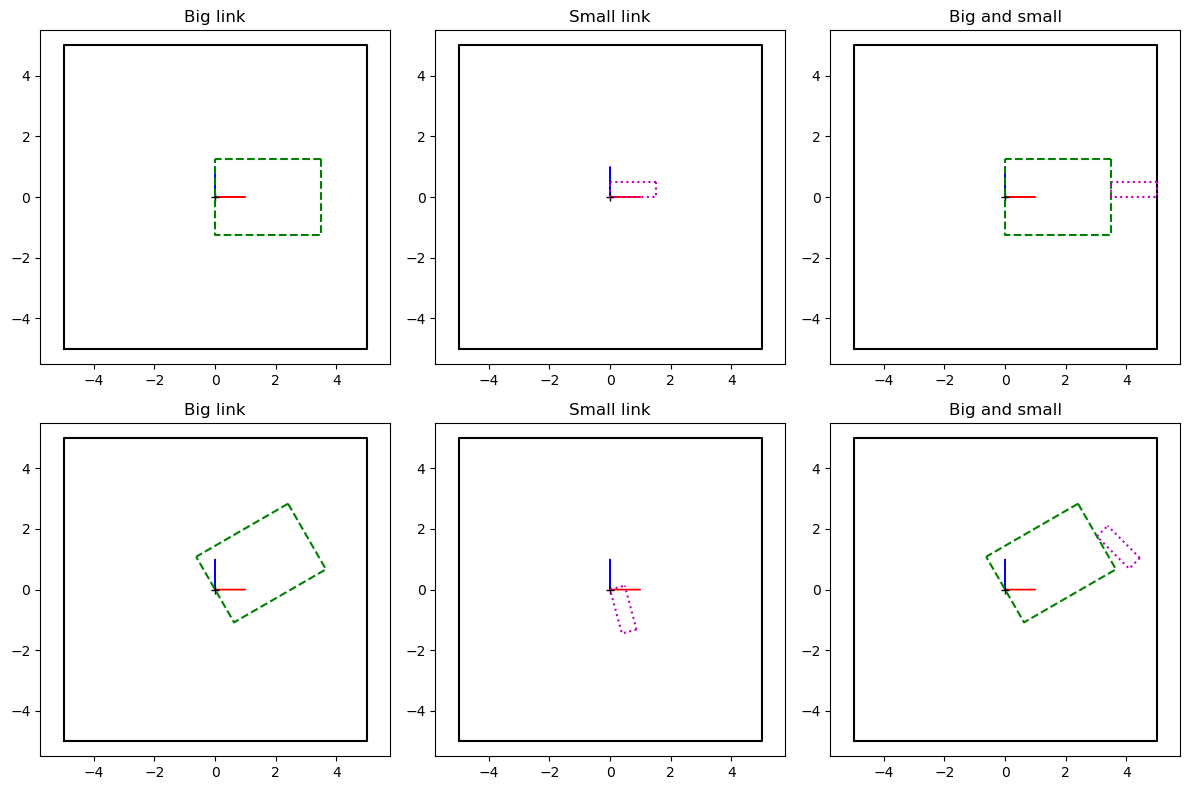

In [14]:
# Plot code - from left to right
# 
# Plot the result - see slides
n_rows = 2
n_cols = 3
fig, axs = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 4 * n_rows))

# A framing window
for i in range(0, n_rows * n_cols):
    plot_axes_and_big_box(axs[i // n_cols, i % n_cols])

# Plot the transformed square - notice that we string the matrices together here
#   In the Lab you'll be building the mat_transform_square separately from the mat_rotate_link because you'll scale all of the
#   geoemtry first, then roatate all of the links to put them together
# The big link before rotating
plot_pts(axs[0, 0], mat_transform_square @ pts_square, fmt="--g")
axs[0, 0].set_title("Big link")
# The small link before rotating
plot_pts(axs[0, 1], mat_transform_square_small @ pts_square, fmt=":m")
axs[0, 1].set_title("Small link")

# The big and small link before rotating, but the small link translated to the end of the big
plot_pts(axs[0, 2], mat_transform_square @ pts_square, fmt="--g")
plot_pts(axs[0, 2], mat_move_small_to_end_of_big @ mat_transform_square_small @ pts_square, fmt=":m")
axs[0, 2].set_title("Big and small")

# Now with rotations
# The big link before rotating
plot_pts(axs[1, 0], mat_rotate_link @ mat_transform_square @ pts_square, fmt="--g")
axs[1, 0].set_title("Big link")
# The small link before rotating
plot_pts(axs[1, 1], mat_rotate_link_small @ mat_transform_square_small @ pts_square, fmt=":m")
axs[1, 1].set_title("Small link")

# Ensuring that the little link rotates with the big one - notice the re-use of the big link rotation matrix
plot_pts(axs[1, 2], mat_rotate_link @ mat_transform_square @ pts_square, fmt="--g")
plot_pts(axs[1, 2], mat_rotate_link @ mat_move_small_to_end_of_big @ mat_rotate_link_small @ mat_transform_square_small @ pts_square, fmt=":m")
axs[1, 2].set_title("Big and small")

fig.tight_layout()

In [15]:
grader.check("make_smaller_link")

make_smaller_link results: All test cases passed!

## Hours and collaborators
Required for every assignment - fill out before you hand-in.

Listing names and websites helps you to document who you worked with and what internet help you received in the case of any plagiarism issues. You should list names of anyone (in class or not) who has substantially helped you with an assignment - or anyone you have *helped*. You do not need to list TAs.

Listing hours helps us track if the assignments are too long.

In [69]:

# List of names (creates a set)
worked_with_names = {"none"}
# List of URLS TCW3 (creates a set)
websites = {"none"}
# Approximate number of hours, including lab/in-class time
hours = 1

In [70]:
grader.check("hours_collaborators")

hours_collaborators results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Submit through gradescope, Lecture activity 5: Matrices. Include just the .ipynb file - the code files, matrix_routines.py, and object_routines.py will be included for you.

In [71]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)

Running your submission against local test cases...




RuntimeError: c:\Users\yeasshhhh\anaconda3\Lib\site-packages\zmq\_future.py:679: RuntimeWarning: Proactor event loop does not implement add_reader family of methods required for zmq. Registering an additional selector thread for add_reader support via tornado. Use `asyncio.set_event_loop_policy(WindowsSelectorEventLoopPolicy())` to avoid this warning.
  self._get_loop()
